In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

In [2]:
# parameter setting
amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz
dur = 0.5        # in seconds
freq = 100.0     # sine frequency, Hz

In [3]:
# generate time
t = np.arange(1, sr * dur+1)/sr

In [4]:
# generate phase
theta = t * 2*np.pi * freq

In [5]:
# generate signal by cosine-phasor
s = np.sin(theta)

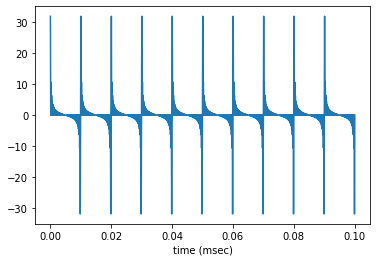

In [6]:
# generate samples, note conversion to float32 array
F0 = 100; Fend = int(sr/2); s = np.zeros(len(t));
for freq in range(F0, Fend+1, F0):
    theta = t * 2*np.pi * freq
    tmp = amp * np.sin(theta)
    s = s + tmp
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000]); 
ax.set_xlabel('time (msec)')
ipd.Audio(s, rate=sr)

In [7]:
def hz2w(F, sr):
    NyFreq = sr/2;
    w = F/NyFreq *np.pi;
    return w

def resonance (srate, F, BW):
    a2 = np.exp(-hz2w(BW,srate))
    omega = F*2*np.pi/srate
    a1 = -2*np.sqrt(a2)*np.cos(omega)
    a = np.array([1, a1, a2])
    b = np.array([sum(a)])
    return a, b

In [8]:
RG = 0  # RG is the frequency of the Glottal Resonator
BWG = 100  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [9]:
RG = 500  # RG is the frequency of the Glottal Resonator
BWG = 60  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [10]:
RG = 1500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [11]:
RG = 2500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [12]:
RG = 3500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [13]:
s = lfilter(np.array([1, -1]), np.array([1]), s)
ipd.Audio(s, rate=sr)

In [14]:
# s라는 소리가 만들어진 상태에서 s가 target wave
from scipy.io import wavfile 
# sr, s = wavfile.read('a.wav')
# scipy.io에서 wavefile이라는 function을 쓸 수 있도록 import 한 것 # 외부에서 어떤 소리를 wavefile로 가지고 오고 싶을 때
nSamp = len(s) # s 벡터의 사이즈, 샘플의 개수 알아내는 것
dur = nSamp / sr
t = np.linspace(1/sr, dur, nSamp)

In [15]:
nFFT = nSamp # nFFT로 이름을 바꿈 
amp = []; 
for n in range(0,nFFT): # 샘플의 개수만큼 for loop를 돎
    omega = 2*np.pi*n/nFFT # angular velocity # 
    z = np.exp(omega*1j)**(np.arange(0,nSamp)) # z는 complex wave를 loop의 개수만큼 만드는 것, complex phasor를 이용하는?
    amp.append(np.abs(np.dot(s,z))) # s와 n번째 루프에서 만들어진 z를 dot product # abs :  절댓값 # amp라는 variable에 append 
    # amp는 loop의 갯수만큼 크기를 가지고 있음 
    # Q.for loop이 끝나고 나서 amp의 길이는? # Q. amp에 허수가 들어 있다 - X (abs 했기 때문)

Text(0, 0.5, 'amplitude')

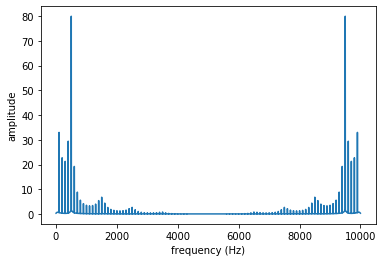

In [16]:
#amp에 plotting(?)
fig = plt.figure() 
ax = fig.add_subplot(111)
freq = np.arange(1,nFFT+1)*sr/nFFT; 
# ex) [1...100] * 10000(sr) / 100(sample 갯수) => [10000/100.....10000(sr)] = [100,200,300..] 대괄호 안의 갯수는 100개로 계속 동일
ax.plot(freq, amp) 
ax.set_xlabel('frequency (Hz)')
ax.set_ylabel('amplitude')

In [17]:
# 한 개의 bar = inner product와 abs를 거친 값 하나 / bar의 총 개수 = sample의 개수
# 왼쪽과 오른쪽이 대칭 / 5000이후는 의미x? (sr의 반 만큼만 의미가 있음 nyquist freq.)
# 앞의 half를 부를 때 spectrum이라고 함. 각 freq 성분들이 proving을 한 값(?)
# 1. freq가 높아질수록 작아지게 만듦 (->resonance?/ 이 과정 안거쳤다면 그래프는 flat한 모양)/ 2. 500,1500,2500에 formant을 만듦 
# 피치가 낮은 악기는 freq가 낮은 쪽에서 세게 나옴, 높은 악기는 freq가 4000쯤에서? 나옴 
# 가로축은 시간축이 아님, 고정된 시간에서 어떤 성분이 많은가를 알 수 있음 / spectrogram의 한 slice?

In [18]:
# 5000hz부터는 필요 없음, half만큼만 표현 가능 
# spectrogram은 3차원 

In [25]:
def frame_signal(signal, srate, win_size, win_step):
    frame_size = int(win_size * srate)
    frame_step = int(win_step * srate)

    # Get number of frames
    num_frames = int(np.ceil(np.abs(len(signal) - frame_size) / frame_step))
    # Pad signal
    pad_len = num_frames * frame_step + frame_size
    pad = np.zeros((pad_len - len(signal)))
    signal_padded = np.append(signal, pad)
    # Get within-frame sample indices
    idx1 = np.tile(np.arange(0, frame_size), (num_frames, 1))
    # Get vectors of frame_step increments
    idx2 = np.tile(np.arange(0, num_frames * frame_step, frame_step),
                   (frame_size, 1)).T
    # Get total indices divided by each frame
    indices = idx1 + idx2
    # Get frames divided by each frame based on indices
    frames = signal_padded[indices.astype(np.int32, copy=False)]
#     if cutoff is not None:
#         cutoff_bin = round(cutoff * nfft / (srate))  # hz -> bin
#         frames = frames[:, :cutoff_bin]
    return frames

def get_window(win_size, srate, win_type, win_samp=None):
    '''Get window samples for win_size'''
    if win_samp is None:
        win_samp = int(win_size * srate)  # sec -> sample

    if win_type == 'rect':
        return np.kaiser(win_samp, 0)
    elif win_type == 'hamming':
        return np.hamming(win_samp)
    elif win_type == 'hanning':
        return np.hanning(win_samp)
    elif win_type == 'kaiser':
        return np.kaiser(win_samp, 14)
    elif win_type == 'blackman':
        return np.blackman(win_samp)

def plot_spectrogram(S):
    fig, ax = plt.subplots(facecolor='white', figsize=(14, 6))
    im = ax.imshow(S.T, aspect='auto', origin='lower', cmap=plt.get_cmap('Greys'))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im, cax=cax)
    return fig, ax

def preemphasis(s, pre_emp=0.97):
    # Emphasize high frequency range of the waveform by increasing power(squared amplitude).
    s = lfilter([1, -pre_emp], [1], s)
    return s

In [26]:
max_freq = None  # cutoff freq
win_size = 0.008 # sec # 
win_step = 0.001  # sec # 0.001만큼 이동해서 합치기 반복
win_type = 'hanning' # options: 'rect', 'hamming', 'hanning', 'kaiser', 'blackman'
nfft = 1024

# Emphasize signal
s = preemphasis(s)
# Frame signal
frames = frame_signal(s, sr, win_size, win_step)
# Apply window function
frames *= get_window(win_size, sr, win_type)
print('frames:', frames.shape)

frames: (492, 80)


(<Figure size 1008x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x26f246e7ac8>)

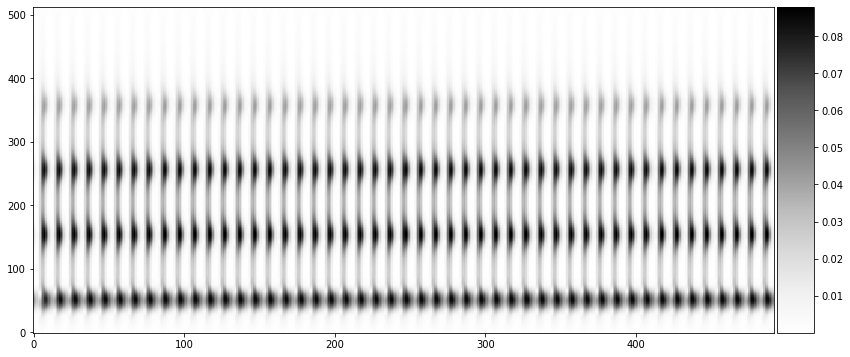

In [27]:
magspec = np.abs(np.fft.rfft(frames, n=nfft)) # frames x (nfft//2 + 1)
plot_spectrogram(magspec) 
# 파란 그래프에서처럼 첫번째에 해당하는 부분만 진하게 나옴 
# dot product를 하면 complex number가 나오고 abs해서 = 그것을 plotting 한 것
# 진한 부분은 1보다 큰 값, 연한 부분은 0.1보다 작은 값 => 제곱 : 훨씬 커지고 작아짐 

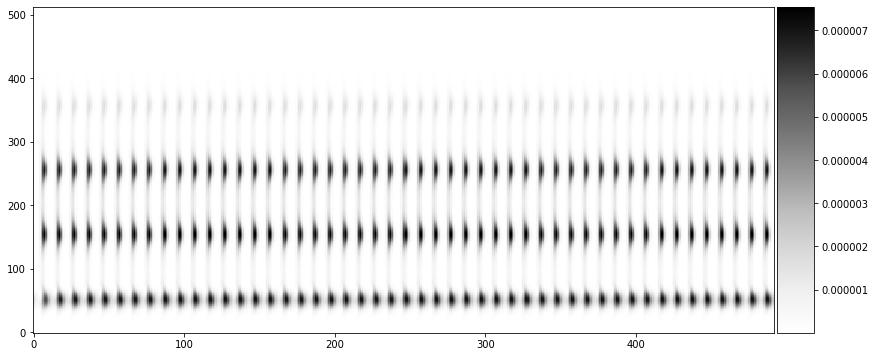

In [28]:
powspec = 1/nfft * (magspec**2) # **2 = 제곱 -> 1보다 크면 훨씬 커지고 1보다 작으면 훨씬 더 0에 가까워짐
# log 취하기 위해서 하는 작업
plot_spectrogram(powspec);

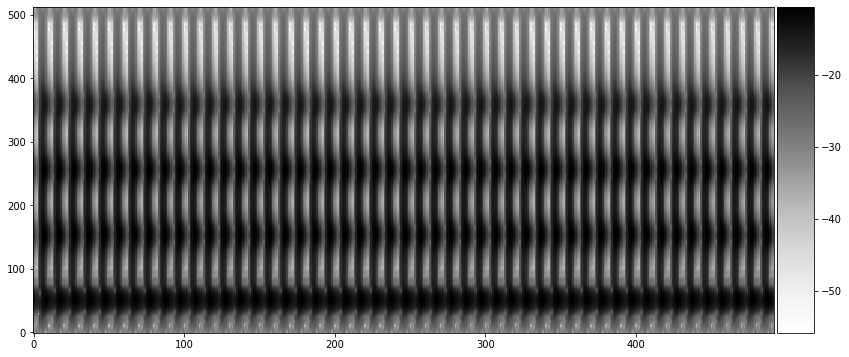

In [29]:
logspec = 10 * np.log10(magspec) # dB scale 
# 0.00001 => 10의 4승에 해당하는 부분이 log10을 하면 -4로? 
# 너무 크거나 작아지지 않은 reasonable하게 다룰 수 있는 숫자로 바꾸는 것이 log처리
plot_spectrogram(logspec) ; 

# 원래 갚에 power를 하고 log를 하기

In [30]:
#12.05 추가 